## Instagram Likes Prediction Model
## **TEAM D-TALE** 
**SYMBIOSIS INSTITUTE OF OPERATIONS MANAGEMENT, NASHIK**

In [54]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter('ignore')

In [55]:
train = pd.read_csv('C://Users//Anuvrat Shukla//Desktop//competitions//Analytics//Regression//ISB _Intagram posts//train.csv',encoding="ISO-8859-1", parse_dates=[10,11])
train.shape

(16539, 22)

In [56]:
train.head()

,numberPosts,Website,urlProfile,username,numberFollowing,descriptionProfile,alias,numberFollowers,urlImgProfile,filename,...,mentions,multipleImage,NoOfImages,isVideo,localization,tags,numberLikes,url,Influencer Level,description
0,49,instagram.com/bestofstreetstyled,https://www.instagram.com/mensflair/,Men | Style | Class | Fashion,10,Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...,mensflair,124965,https://scontent.cdninstagram.com/t51.2885-19/...,18161447_1658356384474317_9111601070664056832_...,...,['@the_vasco'],0,1,0,NaN,"['#suit', '#suits', '#gentlemen', '#gentlemens...",17,https://www.instagram.com/p/BTilZcThQq5/?taken...,Low Influencer,Courtesy of @the_vasco\r\n____________________...
1,49,instagram.com/bestofstreetstyled,https://www.instagram.com/mensflair/,Men | Style | Class | Fashion,10,Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...,mensflair,124965,https://scontent.cdninstagram.com/t51.2885-19/...,18298601_121409661745614_6986690297598050304_n...,...,['@johnnyedlind'],0,1,0,NaN,[],304,https://www.instagram.com/p/BTiROoghcLV/?taken...,Low Influencer,Style by: @johnnyedlind\r\nWhatcha say ï¿½ï¿½ï...
2,49,instagram.com/bestofstreetstyled,https://www.instagram.com/mensflair/,Men | Style | Class | Fashion,10,Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...,mensflair,124965,https://scontent.cdninstagram.com/t51.2885-19/...,18161743_412774429107168_768065153252982784_n.jpg,...,['@max_haim'],0,1,0,NaN,[],438,https://www.instagram.com/p/BTh66MZB7BP/?taken...,Low Influencer,Stunning View - Tag Someone You Would Skydive ...
3,49,instagram.com/bestofstreetstyled,https://www.instagram.com/mensflair/,Men | Style | Class | Fashion,10,Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...,mensflair,124965,https://scontent.cdninstagram.com/t51.2885-19/...,18251869_290881328035320_2327183756814712832_n...,...,['@magic_fox'],0,1,0,NaN,"['#suit', '#suits', '#gentlemen', '#gentlemens...",272,https://www.instagram.com/p/BThniHNlXhO/?taken...,Low Influencer,Courtesy of @magic_fox\r\n____________________...
4,49,instagram.com/bestofstreetstyled,https://www.instagram.com/mensflair/,Men | Style | Class | Fashion,10,Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...,mensflair,124965,https://scontent.cdninstagram.com/t51.2885-19/...,18160659_214392992395434_3720859060493352960_n...,...,['@bookonin'],0,1,0,NaN,[],672,https://www.instagram.com/p/BThRe9-BZh0/?taken...,Low Influencer,"Tag someone you would take - Santorini, Greece..."


In [57]:
train.columns

Index(['numberPosts', 'Website', 'urlProfile', 'username', 'numberFollowing',
       'descriptionProfile', 'alias', 'numberFollowers', 'urlImgProfile',
       'filename', 'Date', 'urlImage', 'mentions', 'multipleImage',
       'NoOfImages', 'isVideo', 'localization', 'tags', 'numberLikes', 'url',
       'Influencer Level', 'description'],
      dtype='object')

**Removing URL features**

In [58]:
train=train.drop(['Website','urlProfile','urlImgProfile','urlImage','url'], axis = 1)

**Extracting Date Featurees**

In [59]:
for attr in ['year', 'month', 'day', 'week', 'dayofweek']:                                                                     # running loop for extracting new features from date
  train[attr] = getattr(train['Date'].dt, attr)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   numberPosts         16539 non-null  int64         
 1   username            16335 non-null  object        
 2   numberFollowing     16539 non-null  int64         
 3   descriptionProfile  16148 non-null  object        
 4   alias               16539 non-null  object        
 5   numberFollowers     16539 non-null  int64         
 6   filename            16539 non-null  object        
 7   Date                16539 non-null  datetime64[ns]
 8   mentions            16539 non-null  object        
 9   multipleImage       16539 non-null  int64         
 10  NoOfImages          16539 non-null  int64         
 11  isVideo             16539 non-null  int64         
 12  localization        6887 non-null   object        
 13  tags                16539 non-null  object    

In [61]:
train.nunique()

numberPosts             881
username                956
numberFollowing         631
descriptionProfile      939
alias                   973
numberFollowers         973
filename              16539
Date                    337
mentions               9412
multipleImage             2
NoOfImages               10
isVideo                   1
localization           3322
tags                   6469
numberLikes           12233
Influencer Level          4
description           15685
year                      5
month                    12
day                      31
week                     51
dayofweek                 7
dtype: int64

# % NaN Values

In [62]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

localization          58.4
descriptionProfile     2.4
description            1.3
username               1.2
dayofweek              0.0
multipleImage          0.0
numberFollowing        0.0
alias                  0.0
numberFollowers        0.0
filename               0.0
Date                   0.0
mentions               0.0
NoOfImages             0.0
week                   0.0
isVideo                0.0
tags                   0.0
numberLikes            0.0
Influencer Level       0.0
year                   0.0
month                  0.0
day                    0.0
numberPosts            0.0
dtype: float64

In [63]:
#train = train.drop(['localization'], axis=1)

Creating a seperate group **'Unknown'** for null Values

In [64]:
train[['descriptionProfile','description','username']] = train[['username','descriptionProfile','description']].fillna('unknown')

**Extracting Length of Textual features**

In [65]:
# Mentions
train['mentions_len'] = train['mentions'].apply(lambda x: len(x))
# Tags
train['tags_len'] = train['tags'].apply(lambda x: len(x))
# Description 
train['description_len'] = train['description'].apply(lambda x: len(x))
# Description Profile
train['description_profile_len'] = train['descriptionProfile'].apply(lambda x: len(x))

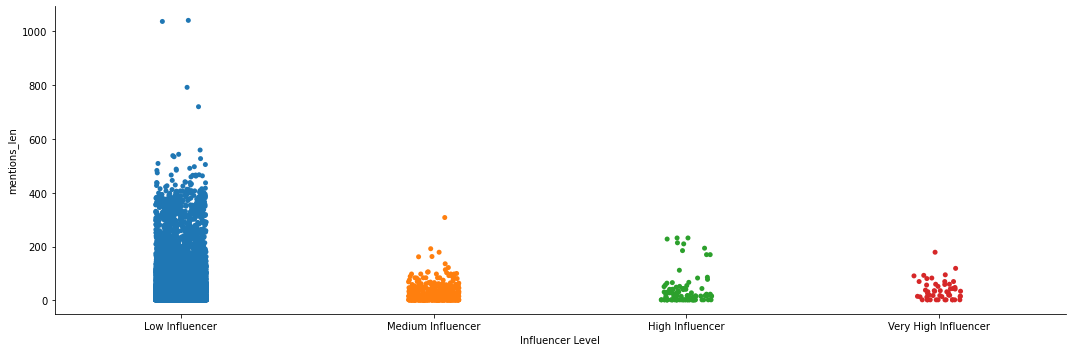

In [153]:
_ = sns.catplot(x="Influencer Level", y="mentions_len", data=train, height=5, aspect=24/8)

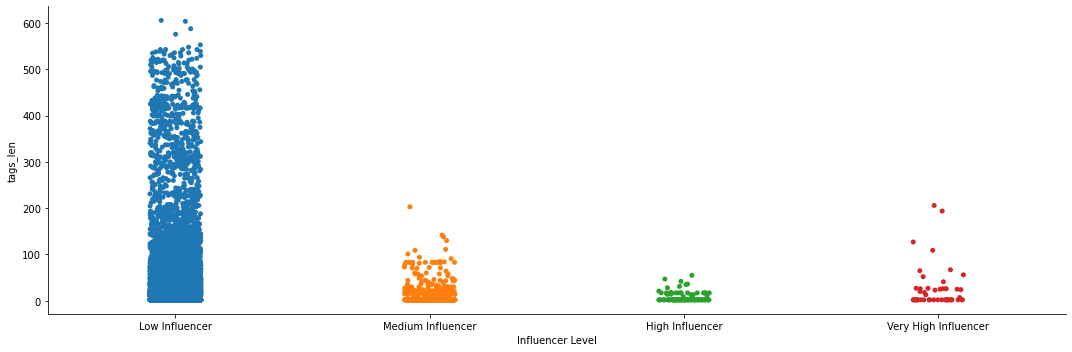

In [134]:
_ = sns.catplot(x="Influencer Level", y="tags_len", data=train, height=5, aspect=24/8)

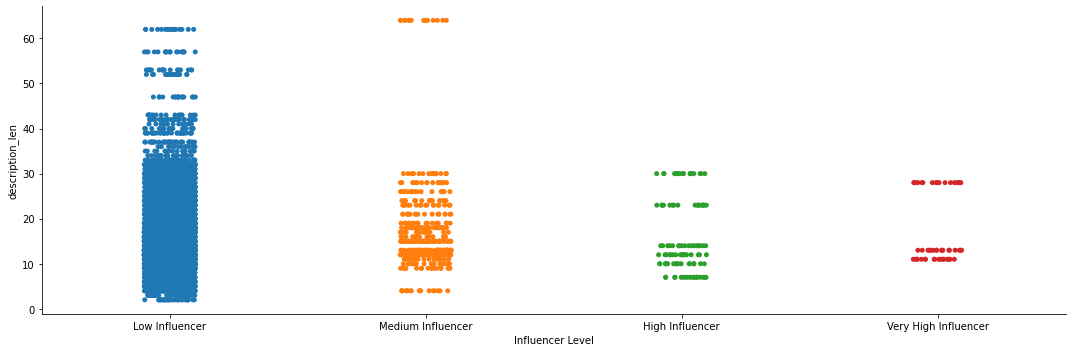

In [96]:
_ = sns.catplot(x="Influencer Level", y="description_len", data=train, height=5, aspect=24/8)

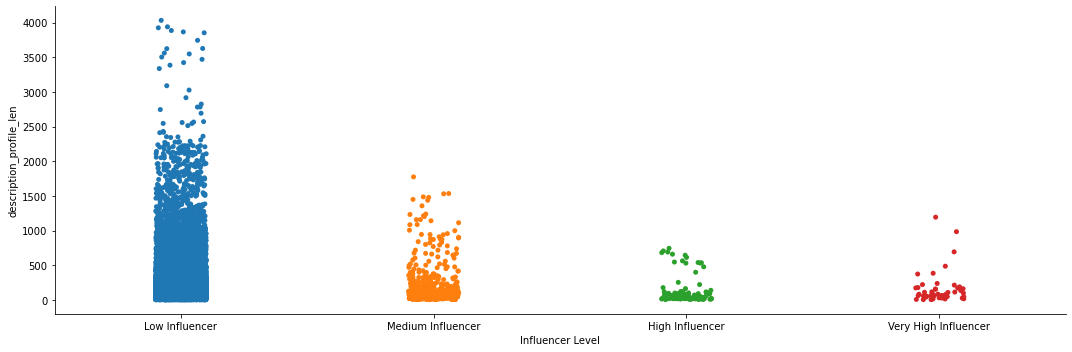

In [97]:
_ = sns.catplot(x="Influencer Level", y="description_profile_len", data=train, height=5, aspect=24/8)

In [98]:
train.shape

(16539, 27)

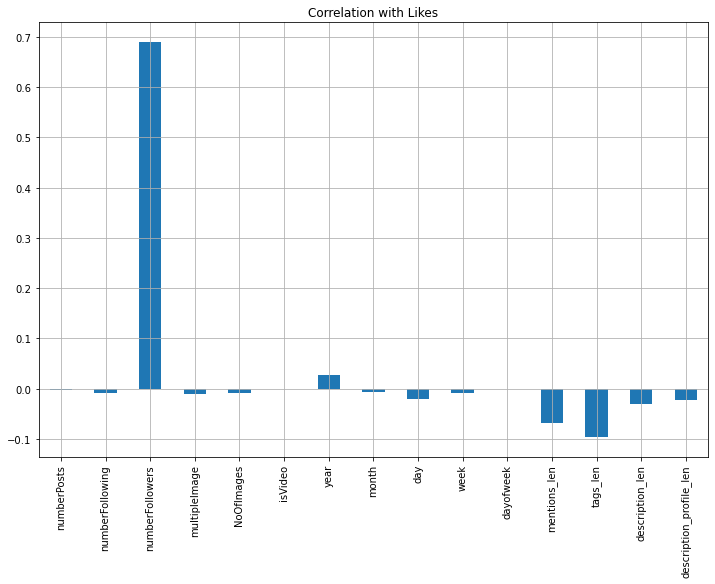

In [16]:
train.drop('numberLikes', axis=1).corrwith(train.numberLikes).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with Likes")

# FEATURES

In [66]:
ID_COL, TARGET_COL = 'filename', 'numberLikes'

num_cols = ['numberPosts', 'numberFollowing', 'numberFollowers',
            'mentions_len','tags_len','description_len','description_profile_len',
           'year','month','day','week','dayofweek']
cat_cols = ['isVideo', 'multipleImage','Influencer Level']
text_cols = ['username', 'descriptionProfile', 'alias', 'filename','mentions','localization','tags','description']
date_cols = ['Date','Time']

In [67]:
train.describe()

,numberPosts,numberFollowing,numberFollowers,multipleImage,NoOfImages,isVideo,numberLikes,year,month,day,week,dayofweek,mentions_len,tags_len,description_len,description_profile_len
count,16539.000000,1.653900e+04,1.653900e+04,16539.000000,16539.000000,16539.0,1.653900e+04,16539.000000,16539.000000,16539.000000,16539.000000,16539.000000,16539.000000,16539.000000,16539.000000,16539.000000
mean,2315.732451,2.590563e+03,9.978294e+05,0.029143,1.079811,0.0,2.441426e+04,2016.966806,4.530685,20.270573,18.342947,3.272689,46.380495,36.965717,106.468771,16.204003
std,2655.384118,5.909066e+04,1.934401e+06,0.168213,0.589168,0.0,6.422060e+04,0.203485,2.157780,8.729339,8.881140,1.996674,67.157214,74.623383,48.937869,7.539936
min,15.000000,0.000000e+00,1.249650e+05,0.000000,1.000000,0.0,0.000000e+00,2013.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000
25%,787.000000,1.910000e+02,1.980390e+05,0.000000,1.000000,0.0,3.232500e+03,2017.000000,4.000000,16.000000,16.000000,2.000000,2.000000,2.000000,71.000000,11.000000
50%,1481.000000,3.960000e+02,3.938430e+05,0.000000,1.000000,0.0,7.351000e+03,2017.000000,4.000000,23.000000,17.000000,3.000000,26.000000,13.000000,111.000000,14.000000
75%,2932.000000,6.450000e+02,9.353100e+05,0.000000,1.000000,0.0,1.835700e+04,2017.000000,4.000000,27.000000,17.000000,5.000000,58.000000,39.000000,143.000000,20.000000
max,27671.000000,1.838511e+06,2.213073e+07,1.000000,10.000000,0.0,1.115123e+06,2017.000000,12.000000,31.000000,52.000000,6.000000,1041.000000,606.000000,375.000000,64.000000


**Log transformed data**

Since the data is highly right skewed, we will take log to avoid biased result

In [144]:
train[num_cols + ['numberLikes']] = train[num_cols + ['numberLikes']].apply(lambda x: np.log1p(x))

train[num_cols].head()

,numberPosts,numberFollowing,numberFollowers,mentions_len,tags_len,description_len,description_profile_len,year,month,day,week,dayofweek,engagement_rate
0,3.912023,2.397895,11.735797,2.708050,5.963579,4.442651,3.401197,7.609862,0.693147,1.791759,0.693147,1.386294,0.013512
1,3.912023,2.397895,11.735797,2.890372,1.098612,4.442651,3.401197,7.609862,1.609438,3.433987,2.890372,1.945910,0.217743
2,3.912023,2.397895,11.735797,2.639057,1.098612,4.442651,3.401197,7.609862,1.609438,3.433987,2.890372,1.945910,0.300474
3,3.912023,2.397895,11.735797,2.708050,5.963579,4.442651,3.401197,7.609862,1.609438,3.433987,2.890372,1.945910,0.196932
4,3.912023,2.397895,11.735797,2.639057,1.098612,4.442651,3.401197,7.609862,1.609438,3.433987,2.890372,1.945910,0.430321


### Helper functions for metrics

Multiplying metric with 1000 to easily compare the results of different models

In [32]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmse(y_true,y_pred):                                             #returns  Log RMSE
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

def metric(y_true,y_pred):                                           #returns Error X  1000 asked by competition 
    #return 1000 * np.sqrt(mean_squared_error(y_true,y_pred))
    return np.sqrt(mean_squared_error(y_true,y_pred))
    
target=train[TARGET_COL]

**Error multiplied with 1000** for better visibility

# # Baseline Model:  Predicting INstagram Likes as mean values

In [146]:
print(target.mean())

9.001619630953556


In [147]:
preds_target= pd.Series([target.mean()] * len(train))

In [148]:
#Predicted
preds_target.head(3)

0    9.00162
1    9.00162
2    9.00162
dtype: float64

In [149]:
#Actual
target.head(3)

0    2.890372
1    5.720312
2    6.084499
Name: numberLikes, dtype: float64

**Metrics**

In [150]:
error         = rmse(target,preds_target)
score_metric  = metric(target,preds_target)

score_metric, error

(1387.6093374115615, 0.14379925353936096)

# Baseline Model2: Predicting using number of posts

Mean Likes per post

In [151]:
((train['numberLikes'] + 1)/(train['numberPosts'] + 1)).mean() 

1.2274703200286574

**Metrics**

In [152]:
preds_target=train['numberPosts'] * 1.227
metric_score=metric(target,preds_target)
error         = rmse(target,preds_target)
metric_score,error

(1850.092401878856, 0.19205714726364576)

# **ML Models** - **IMPORT DATA AGAIN / MANIPULATE **

**Log transformed data**

In [68]:
train[num_cols + ['numberLikes']] = train[num_cols + ['numberLikes']].apply(lambda x: np.log1p(x))

**One Hot Encoding**

In [69]:
train = pd.get_dummies(train, columns = cat_cols)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   numberPosts                            16539 non-null  float64       
 1   username                               16539 non-null  object        
 2   numberFollowing                        16539 non-null  float64       
 3   descriptionProfile                     16539 non-null  object        
 4   alias                                  16539 non-null  object        
 5   numberFollowers                        16539 non-null  float64       
 6   filename                               16539 non-null  object        
 7   Date                                   16539 non-null  datetime64[ns]
 8   mentions                               16539 non-null  object        
 9   NoOfImages                             16539 non-null  int64 

In [81]:
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in text_cols + date_cols]

print('Total feature: {} \nCategorical_Numerical features {}'.format(len(features), len(cat_num_cols)))


Total feature: 28 
Categorical_Numerical features 20


**Split the data set into train (80 %) and validation sets (20%)** 

In [82]:
trn, val = train_test_split(train, test_size=0.2, random_state = 1)

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
#X_test = test_proc[features]

**Fit a regression Model on train, check its results on validation set.**

In [83]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [84]:
def metric(y_true,y_pred):
    return 1000*np.sqrt(mean_squared_error(y_true,y_pred))

**Linear Regression** - Only NUMERICAL Features

In [85]:
clf = LinearRegression()
_=clf.fit(X_trn[num_cols],y_trn)

In [86]:
preds_val=clf.predict(X_val[num_cols])

In [87]:
#RESULT
metric(y_val,preds_val)

905.4717486271715


**Linear Regression** - Categorical + Numerical Features

In [88]:
clf=LinearRegression()
_ = clf.fit(X_trn[cat_num_cols],y_trn)

In [89]:
preds_val=clf.predict(X_val[cat_num_cols])

In [90]:
#Result
metric(y_val,preds_val)

905.2012324765205

#  Decision Tree Regressor - Hyper Parameter Tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}


In [119]:
clf = RandomizedSearchCV(DecisionTreeRegressor(random_state=2),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

In [121]:
search = clf.fit(train[cat_num_cols], train[TARGET_COL])
search.best_params_

{'min_samples_split': 30,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 4}

In [137]:
best_params = {'min_samples_split': 30,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 4}

clf = DecisionTreeRegressor(**best_params,random_state=2)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

#RESULT
metric(y_val, preds_val)

886.985955703252

# Validation Strategy

In [138]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [139]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5                            #Divide in 5 split (K)

  oofs = np.zeros(len(train))             #train prediction
  preds = np.zeros((len(test)))           #test prediction

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop') #splitting target in 10 parts 

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]



    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

**KFold on Decision Tree**

In [150]:
dt_params = {'min_samples_split': 30,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 4}
clf = DecisionTreeRegressor(**dt_params,random_state=2)


In [151]:
dt_oofs, dt_preds = run_clf_kfold(clf, trn, val, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 874.1573475828452

------------- Fold 2 -------------

AV metric score for validation set is 859.3900968875013

------------- Fold 3 -------------

AV metric score for validation set is 924.4664749178214

------------- Fold 4 -------------

AV metric score for validation set is 904.9089224611773

------------- Fold 5 -------------

AV metric score for validation set is 884.3373723764004


AV metric for oofs is 889.7463710771434


# **Gradient Boosting**

## **LightGBM**

In [152]:
from lightgbm import LGBMRegressor

In [153]:
clf = LGBMRegressor(random_state=2)
lgb_oofs, lgb_preds = run_clf_kfold(clf, trn, val, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 551.0360029430689

------------- Fold 2 -------------

AV metric score for validation set is 534.3218718344148

------------- Fold 3 -------------

AV metric score for validation set is 622.4969951080217

------------- Fold 4 -------------

AV metric score for validation set is 594.5164828414804

------------- Fold 5 -------------

AV metric score for validation set is 579.1277482521152


AV metric for oofs is 577.1430869423685


### **Tuning LightGBM**

Lets do , Early Stopping: Stopping the model training, when the model starts to overfit
  
* HyperParameter Optimization.
 

**Simple Function to Run Gradient Boosting**

In [154]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]
 
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return oofs, preds, fi

**Manual Tuning. Choosing Hyperparameters to Tune**


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.621038
[200]	valid_0's rmse: 0.54751
[300]	valid_0's rmse: 0.510455
[400]	valid_0's rmse: 0.49021
[500]	valid_0's rmse: 0.480187
[600]	valid_0's rmse: 0.475475
[700]	valid_0's rmse: 0.471902
[800]	valid_0's rmse: 0.468914
[900]	valid_0's rmse: 0.467564
[1000]	valid_0's rmse: 0.467063
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.467063

AV metric score for validation set is 467.06338880957776

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.60426
[200]	valid_0's rmse: 0.534222
[300]	valid_0's rmse: 0.497737
[400]	valid_0's rmse: 0.481482
[500]	valid_0's rmse: 0.470935
[600]	valid_0's rmse: 0.464778
[700]	valid_0's rmse: 0.461412
[800]	valid_0's rmse: 0.458729
[900]	valid_0's rmse: 0.45612
[1000]	valid_0's rmse: 0.454691
Did not meet early stopping. Best iteration is:


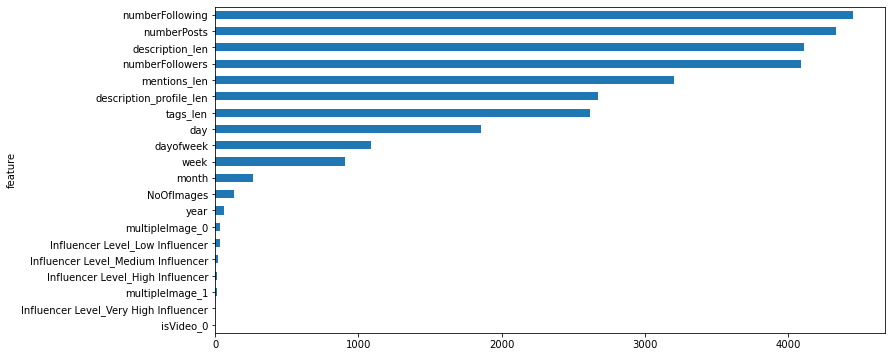

In [155]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        random_state=2)
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**Root Mean Square Error** X 1000 = 104.55-------Good model with low error

As evident from the graph of **decreasing order of importance of features**, Engagement Rate, number of followers,and number of posts, number of following

**Tuning Learning Rate**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.694437
[600]	valid_0's rmse: 0.602493
[900]	valid_0's rmse: 0.55948
[1200]	valid_0's rmse: 0.530788
[1500]	valid_0's rmse: 0.513318
[1800]	valid_0's rmse: 0.501294
[2100]	valid_0's rmse: 0.492397
[2400]	valid_0's rmse: 0.486275
[2700]	valid_0's rmse: 0.481457
[3000]	valid_0's rmse: 0.476973
[3300]	valid_0's rmse: 0.473735
[3600]	valid_0's rmse: 0.471194
[3900]	valid_0's rmse: 0.469504
[4200]	valid_0's rmse: 0.468146
[4500]	valid_0's rmse: 0.467003
[4800]	valid_0's rmse: 0.466118
Did not meet early stopping. Best iteration is:
[4996]	valid_0's rmse: 0.46566

AV metric score for validation set is 465.65986115913915

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.670726
[600]	valid_0's rmse: 0.583983
[900]	valid_0's rmse: 0.541845
[1200]	valid_0's rmse: 0.513053
[1500]	valid_0's rmse: 0.494761
[1

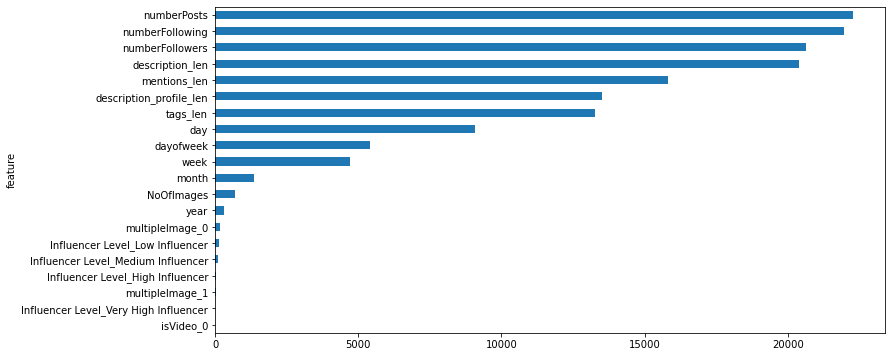

In [158]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        random_state=2)
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

## **CatBoost**


------------- Fold 1 -------------
0:	learn: 1.3792521	test: 1.3983686	best: 1.3983686 (0)	total: 6.25ms	remaining: 18.7s
200:	learn: 0.8874753	test: 0.8797210	best: 0.8797210 (200)	total: 1.9s	remaining: 26.4s
400:	learn: 0.8123110	test: 0.8008266	best: 0.8008266 (400)	total: 3.86s	remaining: 25s
600:	learn: 0.7794172	test: 0.7700951	best: 0.7700951 (600)	total: 5.46s	remaining: 21.8s
800:	learn: 0.7575109	test: 0.7514656	best: 0.7514656 (800)	total: 7.14s	remaining: 19.6s
1000:	learn: 0.7353451	test: 0.7330926	best: 0.7330926 (1000)	total: 9.27s	remaining: 18.5s
1200:	learn: 0.7125228	test: 0.7129678	best: 0.7129678 (1200)	total: 11s	remaining: 16.5s
1400:	learn: 0.6916400	test: 0.6947685	best: 0.6947685 (1400)	total: 12.8s	remaining: 14.6s
1600:	learn: 0.6726337	test: 0.6789727	best: 0.6789727 (1600)	total: 14.9s	remaining: 13.1s
1800:	learn: 0.6558619	test: 0.6656891	best: 0.6656891 (1800)	total: 17.1s	remaining: 11.4s
2000:	learn: 0.6400169	test: 0.6527903	best: 0.6527903 (2000)	

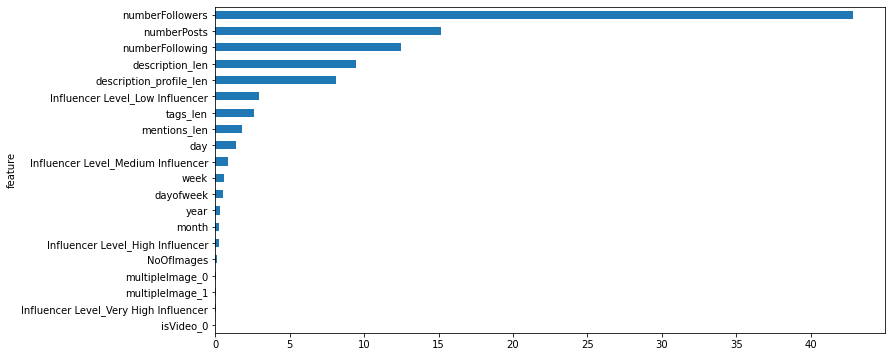

In [159]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2)

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

## XGBoost


------------- Fold 1 -------------
[1]	validation_0-rmse:7.79347
[2]	validation_0-rmse:7.41361
[3]	validation_0-rmse:7.04950
[4]	validation_0-rmse:6.70374
[5]	validation_0-rmse:6.37567
[6]	validation_0-rmse:6.06392
[7]	validation_0-rmse:5.76711
[8]	validation_0-rmse:5.48941
[9]	validation_0-rmse:5.22515
[10]	validation_0-rmse:4.97062
[11]	validation_0-rmse:4.73276
[12]	validation_0-rmse:4.50388
[13]	validation_0-rmse:4.29173
[14]	validation_0-rmse:4.08911
[15]	validation_0-rmse:3.89745
[16]	validation_0-rmse:3.71521
[17]	validation_0-rmse:3.53874
[18]	validation_0-rmse:3.37183
[19]	validation_0-rmse:3.21381
[20]	validation_0-rmse:3.06712
[21]	validation_0-rmse:2.92405
[22]	validation_0-rmse:2.78849
[23]	validation_0-rmse:2.66436
[24]	validation_0-rmse:2.54203
[25]	validation_0-rmse:2.42680
[26]	validation_0-rmse:2.32094
[27]	validation_0-rmse:2.21752
[28]	validation_0-rmse:2.12399
[29]	validation_0-rmse:2.03438
[30]	validation_0-rmse:1.95039
[31]	validation_0-rmse:1.87106
[32]	validat

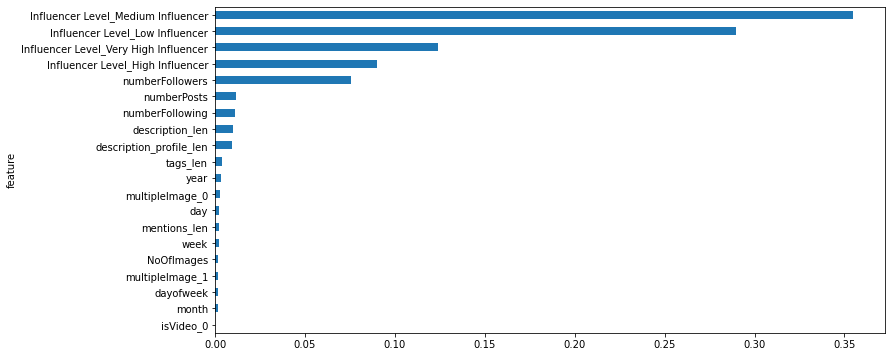

In [160]:
clf = XGBRegressor(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=2)

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

# **TEAM D-TALE**
**SYMBIOSIS INSTITUTE OF OPERATIONS MANAGEMENT NASHIK**